In [2]:
import numpy as np
import matplotlib.pyplot as plt
import blimpy as bl
import glob
import pandas as pd
%matplotlib inline

numexpr.utils   INFO     Note: NumExpr detected 40 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
numexpr.utils   INFO     NumExpr defaulting to 8 threads.


In [3]:
cci = np.load('/datax/scratch/benjb/C23_L_M31_injections/HDBSCAN/non_anom_centroid_idxs.npy', allow_pickle=True)
ccc = np.load('/datax/scratch/benjb/C23_L_M31_injections/HDBSCAN/non_anom_centroids.npy', allow_pickle=True)

In [4]:
unique_ccc, unique_inv, counts = np.unique(ccc, axis=0, return_inverse=True, return_counts=True)

In [4]:
m31_params = np.concatenate(np.load('/datax/scratch/benjb/C23_L_M31_injections/M31_retrieval_params.npy', allow_pickle=True))
m31_dat_paths = np.load('/datax/scratch/benjb/C23_L_M31_injections/M31_retrieval_dat_paths.npy', allow_pickle=True)
dats = np.sort(glob.glob('/datax/scratch/benjb/C23_L_M31_injections/blc7*.dat'))
freqs = []
drifts = []
snrs = []
for dat in dats:
    df = pd.read_table(dat, sep='\s+', names=['Top_Hit_#','Drift_Rate','SNR','Uncorrected_Frequency','Corrected_Frequency',
                                            'Index', 'freq_start', 'freq_end', 'SEFD', 'SEFD_freq', 'Coarse_Channel_Number', 
                                            'Full_number_of_hits'], skiprows=9)
    table_freqs = df['Uncorrected_Frequency'].values
    table_drifts = df['Drift_Rate'].values
    table_snrs = df['SNR'].values
    freqs.append(table_freqs)
    drifts.append(table_drifts)
    snrs.append(table_snrs)
freqs = np.concatenate(freqs)
drifts = np.concatenate(drifts)
snrs = np.concatenate(snrs)
tseti_params = np.transpose([freqs, drifts, snrs])
full_m31_params = np.hstack((tseti_params, m31_params))
print(full_m31_params.shape)
trimmed_m31_params = full_m31_params[
    np.where(((full_m31_params[:,0] > 1100) & (full_m31_params[:,0] < 1200)) |
             ((full_m31_params[:,0] > 1340) & (full_m31_params[:,0] < 1900)))[0]
]
trimmed_m31_dats = m31_dat_paths[
    np.where(((full_m31_params[:,0] > 1100) & (full_m31_params[:,0] < 1200)) |
             ((full_m31_params[:,0] > 1340) & (full_m31_params[:,0] < 1900)))[0]
]
print(trimmed_m31_params.shape)
hit_params = np.load('/datax/scratch/benjb/C23_L_unique_param_array.npy', allow_pickle=True)
hit_dats = np.load('/datax/scratch/benjb/C23_L_unique_dat_list.npy', allow_pickle=True)[:,1]
print(len(hit_dats))

ff = []
for i, dat in enumerate(hit_dats):
    if 'MESSIER031' in dat:
        if ('blc72' in dat) | ('blc73' in dat) | ('blc74' in dat) | ('blc75' in dat):
            ff.append(hit_params[i,0])

params_without_m31 = []
dats_without_m31 = []

for i, dat in enumerate(hit_dats):
    if 'MESSIER031' in dat:
        if ('blc72' in dat) | ('blc73' in dat) | ('blc74' in dat) | ('blc75' in dat):
            continue
    params_without_m31.append(hit_params[i])
    dats_without_m31.append(dat)

print(np.array(params_without_m31).shape)

hit_params = np.vstack((np.array(params_without_m31), trimmed_m31_params))
hit_dats = np.concatenate((np.array(dats_without_m31), trimmed_m31_dats[:,1]))
print(hit_params.shape)
print(hit_dats.shape)

(15582, 12)
(12485, 12)
1917903
(1909390, 12)
(1921875, 12)
(1921875,)


In [5]:
hit_params = np.load('/datax/scratch/benjb/C23_L_M31_injections/HDBSCAN/input_params.npy', allow_pickle=True)
hit_dats = np.load('/datax/scratch/benjb/C23_L_M31_injections/HDBSCAN/input_param_dats.npy', allow_pickle=True)
print(hit_params.shape)
print(hit_dats.shape)

(1918199, 13)
(1918199,)


In [6]:
old_params = np.load('/datax/scratch/benjb/C23_L_unique_param_array.npy', allow_pickle=True)
old_dats = np.load('/datax/scratch/benjb/C23_L_unique_dat_list.npy', allow_pickle=True)[:,1]
old_h5s = np.load('/datax/scratch/benjb/C23_L_unique_h5_list.npy', allow_pickle=True)

In [8]:
unique_old_dats = np.unique(old_dats)
unique_old_h5s = np.unique(old_h5s)
print(unique_old_dats[0])
print(unique_old_h5s[0])
print(unique_old_dats[51])
print(unique_old_h5s[51])
print(unique_old_dats[3001])
print(unique_old_h5s[3001])

/home/obs/turboseti/AGBT18A_999_103/collate/spliced_blc0001020304050607_guppi_58306_31766_DDO210_0002.gpuspec.0000/spliced_blc0001020304050607_guppi_58306_31766_DDO210_0002.gpuspec.0000.dat
/datag/pipeline/AGBT18A_999_103/collate/spliced_blc0001020304050607_guppi_58306_31766_DDO210_0002.gpuspec.0000.h5
/home/obs/turboseti/AGBT19B_999_121/blc71_blp01/blc71_guppi_58832_12658_HIP4581_0046.gpuspec.0000/blc71_guppi_58832_12658_HIP4581_0046.gpuspec.0000.dat
/datag/pipeline/AGBT19B_999_121/blc71_blp01/blc71_guppi_58832_12658_HIP4581_0046.gpuspec.0000.h5
/home/obs/turboseti/AGBT22B_999_20/blc16_blp06/blc16_guppi_59886_09904_HIP16803_0071.rawspec.0000/blc16_guppi_59886_09904_HIP16803_0071.rawspec.0000.dat
/datag/pipeline/AGBT22B_999_20/blc16_blp06/blc16_guppi_59886_09904_HIP16803_0071.rawspec.0000.h5


In [14]:
datlist = glob.glob('/datax/scratch/benjb/C23_L_M31_injections/blc7*.dat')
h5list = glob.glob('/datax/scratch/benjb/C23_L_M31_injections/blc7*.h5')
print(len(datlist))
print(len(h5list))
for i in range(12):
    print(np.sort(datlist)[i])
    print(np.sort(h5list)[i])

unique_old_dats = np.concatenate((unique_old_dats, np.sort(datlist)))
unique_old_h5s = np.concatenate((unique_old_h5s, np.sort(h5list)))

12
12
/datax/scratch/benjb/C23_L_M31_injections/blc72_guppi_58832_16209_MESSIER031_0057.gpuspec.0000.dat
/datax/scratch/benjb/C23_L_M31_injections/blc72_guppi_58832_16209_MESSIER031_0057.gpuspec.0000.h5
/datax/scratch/benjb/C23_L_M31_injections/blc72_guppi_58832_16851_MESSIER031_0059.gpuspec.0000.dat
/datax/scratch/benjb/C23_L_M31_injections/blc72_guppi_58832_16851_MESSIER031_0059.gpuspec.0000.h5
/datax/scratch/benjb/C23_L_M31_injections/blc72_guppi_58832_17485_MESSIER031_0061.gpuspec.0000.dat
/datax/scratch/benjb/C23_L_M31_injections/blc72_guppi_58832_17485_MESSIER031_0061.gpuspec.0000.h5
/datax/scratch/benjb/C23_L_M31_injections/blc73_guppi_58832_16209_MESSIER031_0057.gpuspec.0000.dat
/datax/scratch/benjb/C23_L_M31_injections/blc73_guppi_58832_16209_MESSIER031_0057.gpuspec.0000.h5
/datax/scratch/benjb/C23_L_M31_injections/blc73_guppi_58832_16851_MESSIER031_0059.gpuspec.0000.dat
/datax/scratch/benjb/C23_L_M31_injections/blc73_guppi_58832_16851_MESSIER031_0059.gpuspec.0000.h5
/datax/sc

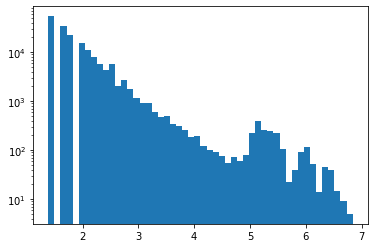

In [20]:
plt.hist(np.log(counts), bins=50)
plt.yscale('log')
plt.show()

In [53]:
counter = 0
for i, count in enumerate(counts):
    if (count < 20) | (count > 500):
        continue
    centroid = unique_ccc[i]
    #print(centroid)
    #print(i)
    if i <= 175000:
        continue
    print(count)
    print(i)
    idxs = cci[np.where(unique_inv == i)[0]]
    #print(len(idxs))
    #print(ccc[np.where(unique_inv == i)[0]])
    #print(idxs)
    counter += 1
    if counter > 10: # change to 10 for 10 figures
        break
    needed_params = hit_params[idxs]
    needed_dats = hit_dats[idxs]
    random_sample_idxs = np.random.choice(len(needed_params), 20, replace=False)
    random_sample_params = needed_params[random_sample_idxs]
    random_sample_dats = needed_dats[random_sample_idxs]
    #break
    fig, axs = plt.subplots(2, 10, figsize=(10,2))
    for j in range(2):
        for k in range(10):
            ii = 10*j + k
            print(ii)
            freq = random_sample_params[ii, 0]
            print(random_sample_dats[ii])
            h5 = unique_old_h5s[np.where(unique_old_dats==random_sample_dats[ii])[0]][0]
            print(h5)
            fb = bl.Waterfall(h5, f_start = freq-0.00135, f_stop = freq+0.00135)
            _, dynamic_spectrum = fb.grab_data()
            axs[j][k].imshow(np.log10(dynamic_spectrum), aspect='auto', interpolation='none')
            axs[j][k].text(0.06, 0.85, f'{round(freq, 2)} MHz', size=6, color='white', horizontalalignment='left', transform=axs[j][k].transAxes)
            axs[j][k].set_xticklabels([])
            axs[j][k].set_yticklabels([])
            axs[j][k].set_yticks([])
            axs[j][k].set_xticks([])
    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.savefig(f'/datax/scratch/benjb/C23_L_M31_injections/small_batch_cluster_pdfs_13/cluster_{i}.pdf', bbox_inches='tight')
    #plt.show()
    #break
print(counter)

0
